# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
api_key = "11e268d7000ffbfbfb0d590b6edeaf77"
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
city_data = []
for city in cities:
        

    
    city_url = url + "&q=" + city

    try:
        city_weather = requests.get(city_url).json()
        print (city_weather)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })
    except: 
        pass



{'coord': {'lon': -94.76, 'lat': 39.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 37.53, 'pressure': 1019, 'humidity': 50, 'temp_min': 33.8, 'temp_max': 42.08}, 'visibility': 16093, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 1}, 'dt': 1549064100, 'sys': {'type': 1, 'id': 4022, 'message': 0.0042, 'country': 'US', 'sunrise': 1549113997, 'sunset': 1549150760}, 'id': 4407665, 'name': 'Kodiak', 'cod': 200}
{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.83, 'pressure': 1017.05, 'humidity': 91, 'temp_min': 76.83, 'temp_max': 76.83, 'sea_level': 1026.96, 'grnd_level': 1017.05}, 'wind': {'speed': 6.76, 'deg': 7.00021}, 'rain': {'3h': 1.01}, 'clouds': {'all': 56}, 'dt': 1549066087, 'sys': {'message': 0.0043, 'country': 'BR', 'sunrise': 1549097393, 'sunset': 1549145930}, 'id': 3466165,

{'coord': {'lon': -69.22, 'lat': -51.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 62.6, 'pressure': 1019, 'humidity': 25, 'temp_min': 62.6, 'temp_max': 62.6}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 230}, 'clouds': {'all': 0}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8293, 'message': 0.0034, 'country': 'AR', 'sunrise': 1549098872, 'sunset': 1549153530}, 'id': 3838859, 'name': 'Rio Gallegos', 'cod': 200}
{'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1010, 'humidity': 73, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 1899, 'message': 0.0042, 'country': 'ZA', 'sunrise': 1549080508, 'sunset': 1549129861}, 'id': 3369157, 'name': 'Cape Town', 'cod': 

{'coord': {'lon': -61.45, 'lat': 10.24}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1013, 'humidity': 69, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 110}, 'clouds': {'all': 20}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8810, 'message': 0.0037, 'country': 'TT', 'sunrise': 1549103307, 'sunset': 1549145439}, 'id': 3573739, 'name': 'Esperance', 'cod': 200}
{'coord': {'lon': -134.97, 'lat': -23.12}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 81.47, 'pressure': 1028.56, 'humidity': 99, 'temp_min': 81.47, 'temp_max': 81.47, 'sea_level': 1028.7, 'grnd_level': 1028.56}, 'wind': {'speed': 8.1, 'deg': 25.5002}, 'clouds': {'all': 48}, 'dt': 1549066097, 'sys': {'message': 0.0052, 'country': 'PF', 'sunrise': 1549118410, 'sunset': 1549165604}, 'id': 4030556, 'name': 'Rikitea

{'coord': {'lon': 4.76, 'lat': 52.96}, 'weather': [{'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 35.04, 'pressure': 994, 'humidity': 100, 'temp_min': 33.8, 'temp_max': 37.4}, 'visibility': 2200, 'wind': {'speed': 6.93, 'deg': 40}, 'clouds': {'all': 90}, 'dt': 1549065300, 'sys': {'type': 1, 'id': 1533, 'message': 0.0037, 'country': 'NL', 'sunrise': 1549092186, 'sunset': 1549124811}, 'id': 2757220, 'name': 'Den Helder', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 168.86, 'lat': -46.19}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 60.18, 'pressure': 1020.45, 'humidity': 58, 'temp_min': 60.18, 'temp_max': 60.18, 'sea_level': 1035.51, 'grnd_level': 1020.45}, 'wind': {'speed': 15.82, 'deg': 260.5}, 'clouds': {'all': 48}, 'dt': 1549

{'coord': {'lon': -37.64, 'lat': 65.61}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.6, 'pressure': 1013, 'humidity': 52, 'temp_min': 17.6, 'temp_max': 17.6}, 'wind': {'speed': 10.29, 'deg': 20}, 'clouds': {'all': 88}, 'dt': 1549061400, 'sys': {'type': 1, 'id': 81, 'message': 0.0042, 'country': 'GL', 'sunrise': 1549106425, 'sunset': 1549130945}, 'id': 3424607, 'name': 'Tasiilaq', 'cod': 200}
{'coord': {'lon': 115.24, 'lat': 5.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.7, 'pressure': 1011, 'humidity': 94, 'temp_min': 78.8, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 9372, 'message': 0.0037, 'country': 'BN', 'sunrise': 1549060537, 'sunset': 1549103388}, 'id': 1733782, 'name': 'Victoria', 'cod': 200}
{'coord': {'lo

{'coord': {'lon': 172.79, 'lat': 3.07}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 83.99, 'pressure': 1021.75, 'humidity': 100, 'temp_min': 83.99, 'temp_max': 83.99, 'sea_level': 1021.77, 'grnd_level': 1021.75}, 'wind': {'speed': 16.49, 'deg': 55.5002}, 'clouds': {'all': 80}, 'dt': 1549066115, 'sys': {'message': 0.0031, 'country': 'KI', 'sunrise': 1549046562, 'sunset': 1549089735}, 'id': 2110227, 'name': 'Butaritari', 'cod': 200}
{'coord': {'lon': 38.73, 'lat': 8.96}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 34.49, 'pressure': 777.92, 'humidity': 57, 'temp_min': 34.49, 'temp_max': 34.49, 'sea_level': 1028.34, 'grnd_level': 777.92}, 'wind': {'speed': 2.62, 'deg': 18.5002}, 'clouds': {'all': 12}, 'dt': 1549066115, 'sys': {'message': 0.0035, 'country': 'ET', 'sunrise': 1549079170, 'sunset': 1549121484}, 'id': 344979, 'name

{'coord': {'lon': 22.13, 'lat': -30.97}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.77, 'pressure': 876.33, 'humidity': 88, 'temp_min': 60.77, 'temp_max': 60.77, 'sea_level': 1027.49, 'grnd_level': 876.33}, 'wind': {'speed': 14.47, 'deg': 72.0002}, 'clouds': {'all': 44}, 'dt': 1549066121, 'sys': {'message': 0.004, 'country': 'ZA', 'sunrise': 1549079936, 'sunset': 1549128656}, 'id': 1014034, 'name': 'Carnarvon', 'cod': 200}
{'coord': {'lon': 35.65, 'lat': 33.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 39.17, 'pressure': 994.84, 'humidity': 84, 'temp_min': 39.17, 'temp_max': 39.17, 'sea_level': 1034.66, 'grnd_level': 994.84}, 'wind': {'speed': 2.39, 'deg': 287}, 'clouds': {'all': 56}, 'dt': 1549066121, 'sys': {'message': 0.0036, 'country': 'IL', 'sunrise': 1549081952, 'sunset': 1549120197}, 'id': 173334, 'name'

{'coord': {'lon': 126.91, 'lat': 41.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 15.45, 'pressure': 935.75, 'humidity': 74, 'temp_min': 15.45, 'temp_max': 15.45, 'sea_level': 1033.08, 'grnd_level': 935.75}, 'wind': {'speed': 7.87, 'deg': 193.5}, 'clouds': {'all': 12}, 'dt': 1549066127, 'sys': {'message': 0.0049, 'country': 'CN', 'sunrise': 1549061069, 'sunset': 1549097279}, 'id': 2036069, 'name': 'Linjiang', 'cod': 200}
{'coord': {'lon': -73.25, 'lat': -3.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.8, 'pressure': 1009, 'humidity': 319, 'temp_min': 42.8, 'temp_max': 42.8}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {'all': 75}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8694, 'message': 0.0041, 'country': 'PE', 'sunrise': 1549105118, 'sunset': 1549149283}, 'id': 3696183, 'name': 'Iquitos', 'cod': 200

{'coord': {'lon': 72.93, 'lat': 0.53}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 81.87, 'pressure': 1023.62, 'humidity': 100, 'temp_min': 81.87, 'temp_max': 81.87, 'sea_level': 1023.68, 'grnd_level': 1023.62}, 'wind': {'speed': 12.01, 'deg': 40.0002}, 'clouds': {'all': 68}, 'dt': 1549066132, 'sys': {'message': 0.0033, 'country': 'MV', 'sunrise': 1549070344, 'sunset': 1549113888}, 'id': 1337610, 'name': 'Thinadhoo', 'cod': 200}
{'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -28.16, 'pressure': 1028.32, 'humidity': 45, 'temp_min': -28.16, 'temp_max': -28.16, 'sea_level': 1053.38, 'grnd_level': 1028.32}, 'wind': {'speed': 7.65, 'deg': 358.5}, 'clouds': {'all': 36}, 'dt': 1549066132, 'sys': {'message': 0.0043, 'country': 'RU', 'sunrise': 1549078877, 'sunset': 1549098003}, 'id': 14902

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -25.67, 'lat': 37.73}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1026, 'humidity': 81, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 6899, 'message': 0.0045, 'country': 'PT', 'sunrise': 1549097162, 'sunset': 1549134427}, 'id': 3372783, 'name': 'Ponta Delgada', 'cod': 200}
{'coord': {'lon': 114.09, 'lat': 71.97}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': -30.41, 'pressure': 1035.94, 'humidity': 51, 'temp_min': -30.41, 'temp_max': -30.41, 'sea_level': 1049.53, 'grnd_level': 1035.94}, 'wind': {'speed': 9.78, 'deg': 322.5}, 'clouds': {'all': 24}, 'dt': 1549066138, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1549075596, 'sunset': 1

{'coord': {'lon': 133.87, 'lat': 44.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -3.05, 'pressure': 991.84, 'humidity': 61, 'temp_min': -3.05, 'temp_max': -3.05, 'sea_level': 1035.96, 'grnd_level': 991.84}, 'wind': {'speed': 2.28, 'deg': 303}, 'clouds': {'all': 0}, 'dt': 1549066144, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1549059723, 'sunset': 1549095286}, 'id': 2025286, 'name': 'Chuguyevka', 'cod': 200}
{'coord': {'lon': 152.85, 'lat': -25.3}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1013, 'humidity': 69, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 13.87, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 9501, 'message': 0.0035, 'country': 'AU', 'sunrise': 1549049102, 'sunset': 1549096745}, 'id': 2146219, 'name': 'Hervey B

{'coord': {'lon': -50.98, 'lat': -25.21}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 66.44, 'pressure': 932.83, 'humidity': 96, 'temp_min': 66.44, 'temp_max': 66.44, 'sea_level': 1027.85, 'grnd_level': 932.83}, 'wind': {'speed': 2.39, 'deg': 122.5}, 'rain': {'3h': 3.29}, 'clouds': {'all': 80}, 'dt': 1549066150, 'sys': {'message': 0.0028, 'country': 'BR', 'sunrise': 1549098054, 'sunset': 1549145639}, 'id': 3452216, 'name': 'Prudentopolis', 'cod': 200}
{'coord': {'lon': 124.85, 'lat': 1.49}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1013, 'humidity': 94, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 2000, 'wind': {'speed': 1.12}, 'clouds': {'all': 40}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 9356, 'message': 0.005, 'country': 'ID', 'sunrise': 1549057952, 'sunset': 1549101356}, 'id': 1636544, 'name'

{'coord': {'lon': 106.21, 'lat': 38.48}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 1.68, 'pressure': 883.38, 'humidity': 69, 'temp_min': 1.68, 'temp_max': 1.68, 'sea_level': 1035.47, 'grnd_level': 883.38}, 'wind': {'speed': 2.51, 'deg': 255}, 'clouds': {'all': 24}, 'dt': 1549066156, 'sys': {'message': 0.0029, 'country': 'CN', 'sunrise': 1549065618, 'sunset': 1549102664}, 'id': 1786657, 'name': 'Yinchuan', 'cod': 200}
{'coord': {'lon': -34.84, 'lat': -6.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1014, 'humidity': 83, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8391, 'message': 0.0038, 'country': 'BR', 'sunrise': 1549095661, 'sunset': 1549140300}, 'id': 3404558, 'name': 'Cabedelo', 'cod': 20

{'coord': {'lon': -16.54, 'lat': 14.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 1014, 'humidity': 82, 'temp_min': 64.4, 'temp_max': 64.4}, 'visibility': 8000, 'wind': {'speed': 19.46, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 2410, 'message': 0.0035, 'country': 'SN', 'sunrise': 1549092866, 'sunset': 1549134324}, 'id': 2249901, 'name': 'Gat', 'cod': 200}
{'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 15.8, 'pressure': 993, 'humidity': 52, 'temp_min': 15.8, 'temp_max': 15.8}, 'visibility': 24140, 'wind': {'speed': 11.41, 'deg': 40, 'gust': 8.7}, 'clouds': {'all': 90}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 797, 'message': 0.0043, 'country': 'CA', 'sunrise': 1549112937, 'sunset': 1549139253}, 'id': 5983720, 'name': 'Iqaluit', 'c

{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': -10.43, 'pressure': 901.14, 'humidity': 79, 'temp_min': -10.43, 'temp_max': -10.43, 'sea_level': 1041.31, 'grnd_level': 901.14}, 'wind': {'speed': 2.28, 'deg': 25.5002}, 'clouds': {'all': 0}, 'dt': 1549066168, 'sys': {'message': 0.0045, 'country': 'CA', 'sunrise': 1549128324, 'sunset': 1549156980}, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
{'coord': {'lon': -78.55, 'lat': -0.39}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1025, 'humidity': 82, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 10}, 'clouds': {'all': 75}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8555, 'message': 0.0045, 'country': 'EC', 'sunrise': 1549106635, 'sunset': 1549150313}, 'id': 3652462, 'name': 

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 24.8, 'lat': -13.68}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 65.81, 'pressure': 904.05, 'humidity': 99, 'temp_min': 65.81, 'temp_max': 65.81, 'sea_level': 1025.14, 'grnd_level': 904.05}, 'wind': {'speed': 4.18, 'deg': 187}, 'rain': {'3h': 2.5175}, 'clouds': {'all': 44}, 'dt': 1549066174, 'sys': {'message': 0.0037, 'country': 'ZM', 'sunrise': 1549080832, 'sunset': 1549126494}, 'id': 905382, 'name': 'Mufumbwe', 'cod': 200}
{'coord': {'lon': 36.46, 'lat': 56.57}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 26.03, 'pressure': 1011.05, 'humidity': 95, 'temp_min': 26.03, 'temp_max': 26.03, 'sea_level': 1033.08, 'grnd_level': 1011.05}, 'wind': {'speed': 6.53, 'deg': 157}, 'clouds': {'all': 80}, 'dt': 1549066174, 'sys': {'message': 0.0042, 'country': 'RU', 'sunrise': 

{'coord': {'lon': 88.53, 'lat': 27.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.46, 'pressure': 914.43, 'humidity': 72, 'temp_min': 46.46, 'temp_max': 46.46, 'sea_level': 1028.86, 'grnd_level': 914.43}, 'wind': {'speed': 2.06, 'deg': 20.0002}, 'clouds': {'all': 0}, 'dt': 1549066184, 'sys': {'message': 0.0034, 'country': 'IN', 'sunrise': 1549068692, 'sunset': 1549108069}, 'id': 1258484, 'name': 'Rangpo', 'cod': 200}
{'coord': {'lon': 166.44, 'lat': 68.06}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': -26.99, 'pressure': 968.9, 'humidity': 40, 'temp_min': -26.99, 'temp_max': -26.99, 'sea_level': 1029.31, 'grnd_level': 968.9}, 'wind': {'speed': 2.06, 'deg': 304}, 'clouds': {'all': 24}, 'dt': 1549066184, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 1549059069, 'sunset': 1549080339}, 'id': 2126682, 'name': 'Bilibino',

{'coord': {'lon': 45.06, 'lat': -25.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.35, 'pressure': 1009.43, 'humidity': 71, 'temp_min': 75.35, 'temp_max': 75.35, 'sea_level': 1025.82, 'grnd_level': 1009.43}, 'wind': {'speed': 12.46, 'deg': 91.0002}, 'clouds': {'all': 0}, 'dt': 1549066189, 'sys': {'message': 0.0029, 'country': 'MG', 'sunrise': 1549074996, 'sunset': 1549122594}, 'id': 1067565, 'name': 'Beloha', 'cod': 200}
{'coord': {'lon': -93.6, 'lat': 16.38}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1014, 'humidity': 57, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 9656, 'wind': {'speed': 16.11, 'deg': 310, 'gust': 12.9}, 'clouds': {'all': 40}, 'dt': 1549065720, 'sys': {'type': 1, 'id': 7162, 'message': 0.0036, 'country': 'MX', 'sunrise': 1549111488, 'sunset': 1549152695}, 'id': 3530097, 'n

{'coord': {'lon': 83.99, 'lat': 28.21}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34.62, 'pressure': 850.88, 'humidity': 66, 'temp_min': 34.62, 'temp_max': 34.62, 'sea_level': 1031.38, 'grnd_level': 850.88}, 'wind': {'speed': 4.07, 'deg': 1.00021}, 'clouds': {'all': 0}, 'dt': 1549066196, 'sys': {'message': 0.0031, 'country': 'NP', 'sunrise': 1549069876, 'sunset': 1549109064}, 'id': 1282898, 'name': 'Pokhara', 'cod': 200}
{'coord': {'lon': 101.63, 'lat': 56.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': -34.61, 'pressure': 1029, 'humidity': 65, 'temp_min': -34.61, 'temp_max': -34.61}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 32}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 8892, 'message': 0.0042, 'country': 'RU', 'sunrise': 1549069691, 'sunset': 1549100808}, 'id': 2051523, 'name': 'Bratsk', 'cod':

{'coord': {'lon': -115.76, 'lat': 40.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 48.92, 'pressure': 1012, 'humidity': 47, 'temp_min': 48.92, 'temp_max': 48.92}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 40}, 'clouds': {'all': 1}, 'dt': 1549061760, 'sys': {'type': 1, 'id': 3961, 'message': 0.0045, 'country': 'US', 'sunrise': 1549119143, 'sunset': 1549155696}, 'id': 5703670, 'name': 'Elko', 'cod': 200}
{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': -7.61, 'pressure': 1015, 'humidity': 76, 'temp_min': -7.61, 'temp_max': -7.61}, 'visibility': 24140, 'wind': {'speed': 13.87, 'deg': 330}, 'clouds': {'all': 75}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 776, 'message': 0.0043, 'country': 'CA', 'sunrise': 1549117346, 'sunset': 1549134894}, 'id': 5924351, 'name': 'Clyde River', 'cod': 2

{'coord': {'lon': 112.95, 'lat': -2.54}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.5, 'pressure': 1017.05, 'humidity': 100, 'temp_min': 73.5, 'temp_max': 73.5, 'sea_level': 1025.99, 'grnd_level': 1017.05}, 'wind': {'speed': 5.75, 'deg': 21.0002}, 'clouds': {'all': 80}, 'dt': 1549066211, 'sys': {'message': 0.004, 'country': 'ID', 'sunrise': 1549060513, 'sunset': 1549104506}, 'id': 1628884, 'name': 'Sampit', 'cod': 200}
{'coord': {'lon': 50.17, 'lat': -14.27}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 76.97, 'pressure': 1019.81, 'humidity': 100, 'temp_min': 76.97, 'temp_max': 76.97, 'sea_level': 1022.46, 'grnd_level': 1019.81}, 'wind': {'speed': 16.71, 'deg': 184}, 'rain': {'3h': 8.0875}, 'clouds': {'all': 80}, 'dt': 1549066211, 'sys': {'message': 0.0032, 'country': 'MG', 'sunrise': 1549074695, 'sunset': 1549120452}, 

{'coord': {'lon': 3.91, 'lat': 46.42}, 'weather': [{'id': 741, 'main': 'Fog', 'description': 'fog', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 32, 'pressure': 990, 'humidity': 93, 'temp_min': 32, 'temp_max': 32}, 'visibility': 450, 'wind': {'speed': 3.4, 'deg': 135.5}, 'clouds': {'all': 90}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 6499, 'message': 0.0033, 'country': 'FR', 'sunrise': 1549091222, 'sunset': 1549126176}, 'id': 2980080, 'name': 'Saint-Francois', 'cod': 200}
{'coord': {'lon': -94.42, 'lat': 30.04}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.6, 'pressure': 1020, 'humidity': 75, 'temp_min': 62.42, 'temp_max': 67.82}, 'visibility': 16093, 'wind': {'speed': 8.05, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1549065300, 'sys': {'type': 1, 'id': 3476, 'message': 0.0038, 'country': 'US', 'sunrise': 1549112850, 'sunset': 1549151736}, 'id': 4732862, 'name': 'Nome', 'cod': 200}
{'coord': {'lon

{'coord': {'lon': 132.26, 'lat': -14.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1007, 'humidity': 74, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 300}, 'clouds': {'all': 40}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 9589, 'message': 0.0041, 'country': 'AU', 'sunrise': 1549054971, 'sunset': 1549100769}, 'id': 2068655, 'name': 'Katherine', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -40.84, 'lat': -2.9}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 76.16, 'pressure': 1018.67, 'humidity': 94, 'temp_min': 76.16, 'temp_max': 76.16, 'sea_level': 1027, 'grnd_level': 1018.67}, 'wind': {'speed': 7.99, 'deg': 81.5002}, 'clouds': {'all': 48}, 'dt': 1549066232, 'sys': {'message': 0.0031, 'country': 'BR', 'sunrise': 1549097401, 

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 150.89, 'lat': 65.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -22.58, 'pressure': 1030.75, 'humidity': 67, 'temp_min': -22.58, 'temp_max': -22.58, 'sea_level': 1040.9, 'grnd_level': 1030.75}, 'wind': {'speed': 9.78, 'deg': 321.5}, 'clouds': {'all': 80}, 'dt': 1549066244, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1549061349, 'sunset': 1549085518}, 'id': 2119283, 'name': 'Zyryanka', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 74.49, 'lat': 65.85}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -43.46, 'pressure': 1050.37, 'humidity': 0, 'temp_min': -43.46, 'temp_max': -43.46, 'sea_level': 1059.3, 'grnd_level': 1050.37}, 'wind': {'speed': 3.51, 'deg': 318.5}, 'clouds': {'all': 56}, 'dt': 1549066245, 'sys': {'message': 

{'coord': {'lon': 57.56, 'lat': 66}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': -12, 'pressure': 1037.31, 'humidity': 78, 'temp_min': -12, 'temp_max': -12, 'sea_level': 1047.75, 'grnd_level': 1037.31}, 'wind': {'speed': 3.29, 'deg': 105.5}, 'clouds': {'all': 80}, 'dt': 1549066220, 'sys': {'message': 0.0037, 'country': 'RU', 'sunrise': 1549083841, 'sunset': 1549107830}, 'id': 863061, 'name': 'Usinsk', 'cod': 200}
{'coord': {'lon': -7.49, 'lat': 11.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.5, 'pressure': 985.11, 'humidity': 65, 'temp_min': 69.5, 'temp_max': 69.5, 'sea_level': 1024.08, 'grnd_level': 985.11}, 'wind': {'speed': 3.06, 'deg': 12.5002}, 'clouds': {'all': 0}, 'dt': 1549066272, 'sys': {'message': 0.0032, 'country': 'ML', 'sunrise': 1549090446, 'sunset': 1549132398}, 'id': 2459775, 'name': 'Bougouni', 'cod': 

{'coord': {'lon': 13.49, 'lat': -14.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 61.98, 'pressure': 899.51, 'humidity': 98, 'temp_min': 61.98, 'temp_max': 61.98, 'sea_level': 1026.55, 'grnd_level': 899.51}, 'wind': {'speed': 0.04, 'deg': 349.5}, 'clouds': {'all': 48}, 'dt': 1549066279, 'sys': {'message': 0.0036, 'country': 'AO', 'sunrise': 1549083449, 'sunset': 1549129305}, 'id': 3347762, 'name': 'Lubango', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 16.94, 'lat': 48.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 38.05, 'pressure': 995, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 39.2}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 6851, 'message': 0.004, 'country': 'CZ', 'sunrise': 1549088502, 'sunset': 1549

{'coord': {'lon': 145.77, 'lat': -16.92}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1004, 'humidity': 94, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 20}, 'clouds': {'all': 90}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 9490, 'message': 0.0038, 'country': 'AU', 'sunrise': 1549051530, 'sunset': 1549097723}, 'id': 2172797, 'name': 'Cairns', 'cod': 200}
{'coord': {'lon': -38.6, 'lat': -3.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1011, 'humidity': 88, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 3.36, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8363, 'message': 0.0037, 'country': 'BR', 'sunrise': 1549096804, 'sunset': 1549140964}, 'id': 6320062, 'name': 'Vila

{'coord': {'lon': 75.23, 'lat': 23.02}, 'weather': [{'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1016, 'humidity': 62, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 5000, 'wind': {'speed': 9.17, 'deg': 40}, 'clouds': {'all': 0}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 9067, 'message': 0.0036, 'country': 'IN', 'sunrise': 1549071517, 'sunset': 1549111625}, 'id': 1277970, 'name': 'Badnawar', 'cod': 200}
{'coord': {'lon': 174.07, 'lat': -41.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 62.21, 'pressure': 1017.7, 'humidity': 88, 'temp_min': 62.21, 'temp_max': 62.21, 'sea_level': 1036.04, 'grnd_level': 1017.7}, 'wind': {'speed': 8.77, 'deg': 131.5}, 'clouds': {'all': 12}, 'dt': 1549066292, 'sys': {'message': 0.0038, 'country': 'NZ', 'sunrise': 1549042148, 'sunset': 1549093490}, 'id': 6243926, 'name': 'Seddon', 'cod': 200}
{'

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 120.6, 'lat': 14.94}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 73.49, 'pressure': 1017, 'humidity': 78, 'temp_min': 71.6, 'temp_max': 75.2}, 'visibility': 8000, 'wind': {'speed': 2.24, 'deg': 310}, 'clouds': {'all': 90}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8152, 'message': 0.003, 'country': 'PH', 'sunrise': 1549059976, 'sunset': 1549101381}, 'id': 1705441, 'name': 'Lubao', 'cod': 200}
{'coord': {'lon': -70.23, 'lat': 8.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.17, 'pressure': 1008.54, 'humidity': 66, 'temp_min': 79.17, 'temp_max': 79.17, 'sea_level': 1023.76, 'grnd_level': 1008.54}, 'wind': {'speed': 5.19, 'deg': 356.5}, 'clouds': {'all': 0}, 'dt': 1549066301, 'sys': {'message': 0.0045, 'country': 'VE', 'sunrise': 1549105296, 'sunset': 1549147664}, 

{'coord': {'lon': -73.12, 'lat': -36.72}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1013, 'humidity': 60, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 10.29, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8499, 'message': 0.0035, 'country': 'CL', 'sunrise': 1549102170, 'sunset': 1549152137}, 'id': 3870282, 'name': 'Talcahuano', 'cod': 200}
{'coord': {'lon': -60.67, 'lat': 2.82}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1009, 'humidity': 48, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 80}, 'clouds': {'all': 40}, 'dt': 1549062000, 'sys': {'type': 1, 'id': 8340, 'message': 0.005, 'country': 'BR', 'sunrise': 1549102577, 'sunset': 1549145790}, 'id': 3664980, 'name': 'Boa Vista', 'c

{'coord': {'lon': 167.88, 'lat': -21.55}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.82, 'pressure': 1020.05, 'humidity': 99, 'temp_min': 77.82, 'temp_max': 77.82, 'sea_level': 1020.68, 'grnd_level': 1020.05}, 'wind': {'speed': 21.18, 'deg': 102}, 'rain': {'3h': 0.2175}, 'clouds': {'all': 100}, 'dt': 1549066315, 'sys': {'message': 0.0037, 'country': 'NC', 'sunrise': 1549045830, 'sunset': 1549092805}, 'id': 2138285, 'name': 'Tadine', 'cod': 200}
{'coord': {'lon': -76.65, 'lat': 25.5}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 74.81, 'pressure': 1034.64, 'humidity': 100, 'temp_min': 74.81, 'temp_max': 74.81, 'sea_level': 1034.74, 'grnd_level': 1034.64}, 'wind': {'speed': 20.96, 'deg': 79.5002}, 'clouds': {'all': 0}, 'dt': 1549066068, 'sys': {'message': 0.005, 'country': 'BS', 'sunrise': 1549108172, 'sunset': 1549147881}, 'id':

{'coord': {'lon': 113.61, 'lat': -8.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 76.79, 'pressure': 1014.86, 'humidity': 100, 'temp_min': 76.79, 'temp_max': 76.79, 'sea_level': 1025.18, 'grnd_level': 1014.86}, 'wind': {'speed': 1.39, 'deg': 4.50021}, 'rain': {'3h': 1.3475}, 'clouds': {'all': 68}, 'dt': 1549066321, 'sys': {'message': 0.0036, 'country': 'ID', 'sunrise': 1549059922, 'sunset': 1549104776}, 'id': 1621313, 'name': 'Ambulu', 'cod': 200}
{'coord': {'lon': 132.56, 'lat': 51.07}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -29.51, 'pressure': 976.36, 'humidity': 46, 'temp_min': -29.51, 'temp_max': -29.51, 'sea_level': 1035.19, 'grnd_level': 976.36}, 'wind': {'speed': 2.73, 'deg': 147.5}, 'clouds': {'all': 0}, 'dt': 1549066321, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1549061172, 'sunset': 1549094473}, 'id':

{'coord': {'lon': 39.15, 'lat': 57.26}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 24.8, 'pressure': 1019, 'humidity': 92, 'temp_min': 24.8, 'temp_max': 24.8}, 'visibility': 4000, 'wind': {'speed': 2.24, 'deg': 170}, 'clouds': {'all': 90}, 'dt': 1549063800, 'sys': {'type': 1, 'id': 9023, 'message': 0.0037, 'country': 'RU', 'sunrise': 1549084951, 'sunset': 1549115542}, 'id': 572520, 'name': 'Borisoglebskiy', 'cod': 200}
{'coord': {'lon': 26.64, 'lat': -20.64}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.32, 'pressure': 921, 'humidity': 41, 'temp_min': 78.32, 'temp_max': 78.32, 'sea_level': 1024.45, 'grnd_level': 921}, 'wind': {'speed': 14.14, 'deg': 94.5002}, 'clouds': {'all': 0}, 'dt': 1549066327, 'sys': {'message': 0.003, 'country': 'BW', 'sunrise': 1549079821

{'coord': {'lon': 96.13, 'lat': 4.14}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 77.87, 'pressure': 1021.83, 'humidity': 100, 'temp_min': 77.87, 'temp_max': 77.87, 'sea_level': 1024.12, 'grnd_level': 1021.83}, 'wind': {'speed': 3.62, 'deg': 82.0002}, 'clouds': {'all': 24}, 'dt': 1549066333, 'sys': {'message': 0.004, 'country': 'ID', 'sunrise': 1549065039, 'sunset': 1549108058}, 'id': 1214488, 'name': 'Meulaboh', 'cod': 200}
{'coord': {'lon': 94.81, 'lat': 26.24}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 46.32, 'pressure': 902.19, 'humidity': 91, 'temp_min': 46.32, 'temp_max': 46.32, 'sea_level': 1029.23, 'grnd_level': 902.19}, 'wind': {'speed': 1.5, 'deg': 152.5}, 'clouds': {'all': 24}, 'dt': 1549066333, 'sys': {'message': 0.003, 'country': 'IN', 'sunrise': 1549067101, 'sunset': 1549106644}, 'id': 1254133, 'name': 'Tuensa

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)
city_frame = pd.DataFrame(city_data)
# Extract relevant fields from the data frame
lats_city = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()
city_frame

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kodiak,1,US,1549064100,50,39.95,-94.76,42.08,9.17
1,cidreira,56,BR,1549066087,91,-30.17,-50.22,76.83,6.76
2,vila franca do campo,20,PT,1549063800,81,37.72,-25.43,50.00,2.24
3,albany,1,US,1549065420,48,42.65,-73.75,14.00,3.36
4,punta arenas,75,CL,1549062000,54,-53.16,-70.91,53.60,8.05
5,mar del plata,20,AR,1549066088,43,-46.43,-67.52,69.23,13.47
6,busselton,32,AU,1549065795,100,-33.64,115.35,65.54,16.26
7,bluff,88,AU,1549066088,61,-23.58,149.07,79.85,17.38
8,georgetown,75,GY,1549062000,74,6.80,-58.16,82.40,11.41
9,inuvik,5,CA,1549062000,75,68.36,-133.71,-20.21,4.70


In [16]:
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,kodiak,1,US,1549064100,50,39.95,-94.76,42.08,9.17
1,cidreira,56,BR,1549066087,91,-30.17,-50.22,76.83,6.76
2,vila franca do campo,20,PT,1549063800,81,37.72,-25.43,50.00,2.24
3,albany,1,US,1549065420,48,42.65,-73.75,14.00,3.36
4,punta arenas,75,CL,1549062000,54,-53.16,-70.91,53.60,8.05


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

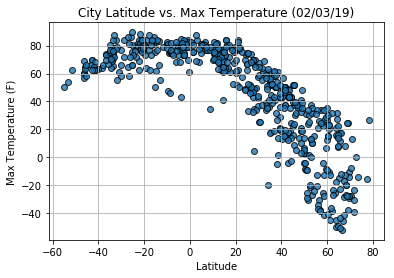

In [17]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats_city, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

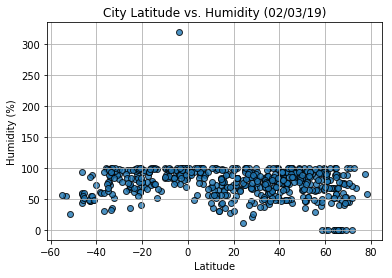

In [18]:
plt.scatter(lats_city, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

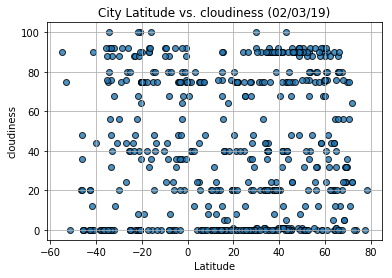

In [25]:
plt.scatter(lats_city, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

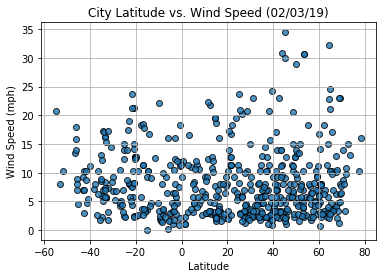

In [26]:
plt.scatter(lats_city, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()